In [14]:
from pathlib import Path
import os

# Running should set working directory to the root of the project, whichi is archive.
# must go back out to import and then back into working directory
os.chdir('..')
from utils import *
os.chdir('archive')


Config.FATIGUESET_AGG_DIRECTORY = os.path.join(DATA_DIRECTORY, 'fatigueset_eeg_data')
FATIGUESET_AGG_DIRECTORY = Config.FATIGUESET_AGG_DIRECTORY

import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter, find_peaks
import os
from math import floor
import glob
import mne
from pathlib import Path



In [16]:
transfer_files = [
    'exp_markers.csv',
    'exp_fatigue.csv',
    'exp_crt.csv',
    'exp_nback.csv',
    'exp_task_switch.csv'
]

mapping = {
    'forehead_eeg_alpha_abs': 'alpha',
    'forehead_eeg_beta_abs' : 'beta',
    'forehead_eeg_theta_abs': 'theta',
    'wrist_hr': 'wrist',
}   


initialize_aggregated_data(transfer_files, mapping)

# Old implementation of obtaining data wrote to separate csvs, not needed in hrv.ipynb
generate_experimental_csvs()

Session folder has already been renamed
Markers have already been renamed
Generated 01_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 02_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 03_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 04_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 05_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 06_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 07_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 08_metadata in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 09_metadata in C:\Users\639766\Documents\Internship\cognitiv

C:\Users\639766\Documents\Internship\cognitive-fatigue-1\utils.py:131: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  person_csv = pd.concat([person_csv, csv], axis=0)


Generated 04_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 05_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 06_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 07_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 08_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 09_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 10_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 11_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data
Generated 12_data.csv in C:\Users\639766\Documents\Internship\cognitive-fatigue-1\data\fatigueset_eeg_data


In [17]:
# full_data contains all the data from specified files in the aggregated fatigueset folder
full_data = get_data_from_csvs()

# full_experimental_data only has data from baseline and mental fatigue period, with Experimental column
# Experimental==0 is baseline, Experimental==1 is mental fatigue inducing task
full_experimental_data = get_experimental_data()
# NEED TO IMPLEMENT


display(full_data)
display(full_experimental_data)

# # # print amount of nans in given column
print(full_experimental_data.isnull().sum())



,person,Session,alpha_TP9,alpha_AF7,alpha_AF8,alpha_TP10,beta_TP9,beta_AF7,beta_AF8,beta_TP10,theta_TP9,theta_AF7,theta_AF8,theta_TP10,wrist_hr
DateTime,,,,,,,,,,,,,,,
2021-09-02 09:08:18,1,high,0.899778,0.426734,0.124582,0.455440,0.478399,0.842039,0.150674,0.513370,-0.119860,0.497552,-0.216115,-0.087068,NaN
2021-09-02 09:08:19,1,high,0.629521,0.426734,0.038355,0.388580,0.438227,0.842039,0.070448,0.456491,-0.091543,0.497552,-0.439057,-0.235839,72.78
2021-09-02 09:08:20,1,high,0.827554,0.426734,0.039634,0.565776,0.643323,0.842039,0.014307,0.518144,0.465887,0.497552,-0.248329,0.444617,72.65
2021-09-02 09:08:21,1,high,1.034175,0.426734,-0.027832,0.545647,0.767581,0.842039,0.162297,0.578512,0.809673,0.497552,-0.057430,0.855137,72.50
2021-09-02 09:08:22,1,high,0.989508,0.426734,-0.164011,0.244589,0.595977,0.842039,0.182729,0.655481,0.616058,0.497552,-0.115724,0.367946,72.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09 16:33:54,12,low,0.931108,0.330675,0.307079,0.548900,0.453519,0.021942,-0.198432,0.506071,1.009938,0.557136,0.364094,0.258839,68.27
2021-09-09 16:33:55,12,low,0.838669,-0.004357,0.268264,0.524424,0.553289,-0.100359,-0.164591,0.373030,0.451781,-0.216708,0.022021,0.379051,68.42
2021-09-09 16:33:56,12,low,0.770953,-0.109208,0.323101,0.406645,0.550116,-0.184642,-0.290998,0.384092,0.532055,-0.075347,0.437556,0.420910,68.58


,person,Session,alpha_TP9,alpha_AF7,alpha_AF8,alpha_TP10,beta_TP9,beta_AF7,beta_AF8,beta_TP10,theta_TP9,theta_AF7,theta_AF8,theta_TP10,wrist_hr,Faulty,experimental
DateTime,,,,,,,,,,,,,,,,,
2021-08-19 10:53:43,1,low,0.526053,0.238651,0.523011,0.435672,0.556242,0.241113,0.315117,0.535666,0.285282,0.055091,0.284577,0.454467,84.41,0,0
2021-08-19 10:53:44,1,low,0.640277,0.355870,0.201420,0.448146,0.426624,0.198327,0.120474,0.514021,0.513998,0.164796,-0.128284,0.446306,84.72,0,0
2021-08-19 10:53:45,1,low,0.477468,0.375379,0.053880,0.176763,0.219955,0.245984,0.051808,0.451051,-0.017409,0.274737,0.139411,0.004873,84.74,0,0
2021-08-19 10:53:46,1,low,0.463617,0.317509,0.201604,0.144848,0.305246,0.304637,0.060435,0.395032,-0.183968,0.156986,0.042040,-0.004984,84.75,0,0
2021-08-19 10:53:47,1,low,0.578845,0.175428,0.180730,0.244786,0.374541,0.250504,0.006123,0.378455,0.056399,-0.107606,-0.287170,0.076480,84.76,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10 16:27:54,12,high,0.649165,0.094437,-0.004240,0.751275,0.392051,-0.128863,-0.076321,0.603388,0.042684,-0.084601,-0.017147,0.520782,77.28,0,1
2021-09-10 16:27:55,12,high,0.654025,-0.039492,0.106710,0.786442,0.465086,-0.088465,-0.140799,0.602191,0.451187,0.116086,0.119490,0.873196,77.35,0,1
2021-09-10 16:27:56,12,high,0.705850,0.218234,0.259831,0.436748,0.401833,-0.147922,-0.088146,0.399356,0.830192,0.179955,0.202856,0.547024,77.38,0,1


person             0
Session            0
alpha_TP9       1195
alpha_AF7       1195
alpha_AF8       1195
alpha_TP10      1195
beta_TP9        1200
beta_AF7        1200
beta_AF8        1200
beta_TP10       1200
theta_TP9       1210
theta_AF7       1210
theta_AF8       1210
theta_TP10      1210
wrist_hr         709
Faulty             0
experimental       0
dtype: int64


In [18]:
full_experimental_data

,person,Session,alpha_TP9,alpha_AF7,alpha_AF8,alpha_TP10,beta_TP9,beta_AF7,beta_AF8,beta_TP10,theta_TP9,theta_AF7,theta_AF8,theta_TP10,wrist_hr,Faulty,experimental
DateTime,,,,,,,,,,,,,,,,,
2021-08-19 10:53:43,1,low,0.526053,0.238651,0.523011,0.435672,0.556242,0.241113,0.315117,0.535666,0.285282,0.055091,0.284577,0.454467,84.41,0,0
2021-08-19 10:53:44,1,low,0.640277,0.355870,0.201420,0.448146,0.426624,0.198327,0.120474,0.514021,0.513998,0.164796,-0.128284,0.446306,84.72,0,0
2021-08-19 10:53:45,1,low,0.477468,0.375379,0.053880,0.176763,0.219955,0.245984,0.051808,0.451051,-0.017409,0.274737,0.139411,0.004873,84.74,0,0
2021-08-19 10:53:46,1,low,0.463617,0.317509,0.201604,0.144848,0.305246,0.304637,0.060435,0.395032,-0.183968,0.156986,0.042040,-0.004984,84.75,0,0
2021-08-19 10:53:47,1,low,0.578845,0.175428,0.180730,0.244786,0.374541,0.250504,0.006123,0.378455,0.056399,-0.107606,-0.287170,0.076480,84.76,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10 16:27:54,12,high,0.649165,0.094437,-0.004240,0.751275,0.392051,-0.128863,-0.076321,0.603388,0.042684,-0.084601,-0.017147,0.520782,77.28,0,1
2021-09-10 16:27:55,12,high,0.654025,-0.039492,0.106710,0.786442,0.465086,-0.088465,-0.140799,0.602191,0.451187,0.116086,0.119490,0.873196,77.35,0,1
2021-09-10 16:27:56,12,high,0.705850,0.218234,0.259831,0.436748,0.401833,-0.147922,-0.088146,0.399356,0.830192,0.179955,0.202856,0.547024,77.38,0,1


In [19]:
full_experimental_data

df = full_experimental_data.copy()[['experimental', 'person', 'alpha_AF7', 'Session', 'Faulty']]


# count faulty rows
faulty_rows = df[df['Faulty'] == 1].shape[0]

# Remove rows that have a faulty ==1 
df = df[df['Faulty'] == 0]

df

# Make a different dataframe for each person / session combo AND FOR EXPERIMENTAL AND BASELINE with the index of the DateTime
base_arr = []
exp_arr = []

for person in range(1, 13):
    for session in ['low', 'medium', 'high']:
        for experimental in [0, 1]:
            person, session = remap_person_and_session(person, session)
            data = df[(df['person'] == int(person)) & (df['Session'] == session) & (df['experimental'] == experimental)]
            if experimental == 0:
                base_arr.append(data)
            else:
                exp_arr.append(data)

print(len(base_arr))


display(base_arr[3])
display(exp_arr[3])




# dfs = []
# for person in range(1, 13):
#     for session in ['low', 'medium', 'high']:
#         person, session = remap_person_and_session(person, session)
#         data = df[(df['person'] == int(person)) & (df['Session'] == session)]
#         dfs.append(data)


# display(dfs[34])

36


,experimental,person,alpha_AF7,Session,Faulty
DateTime,,,,,
2021-08-19 12:32:10,0,2,NaN,low,0
2021-08-19 12:32:11,0,2,NaN,low,0
2021-08-19 12:32:12,0,2,NaN,low,0
2021-08-19 12:32:13,0,2,NaN,low,0
2021-08-19 12:32:14,0,2,NaN,low,0
...,...,...,...,...,...
2021-08-19 12:35:06,0,2,-0.264162,low,0
2021-08-19 12:35:07,0,2,-0.264162,low,0
2021-08-19 12:35:08,0,2,0.263289,low,0


,experimental,person,alpha_AF7,Session,Faulty
DateTime,,,,,
2021-08-19 12:48:41,1,2,0.487861,low,0
2021-08-19 12:48:42,1,2,0.473110,low,0
2021-08-19 12:48:43,1,2,0.157410,low,0
2021-08-19 12:48:44,1,2,0.177099,low,0
2021-08-19 12:48:45,1,2,0.207657,low,0
...,...,...,...,...,...
2021-08-19 12:53:06,1,2,0.121904,low,0
2021-08-19 12:53:07,1,2,0.209314,low,0
2021-08-19 12:53:08,1,2,0.129952,low,0


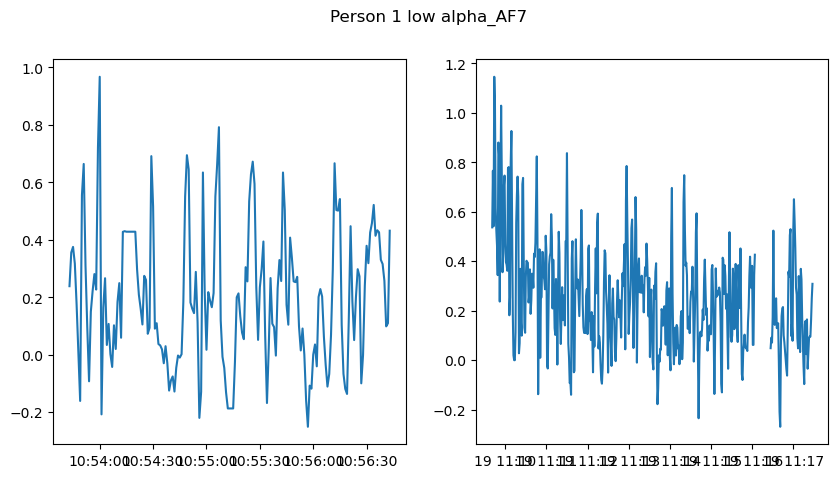

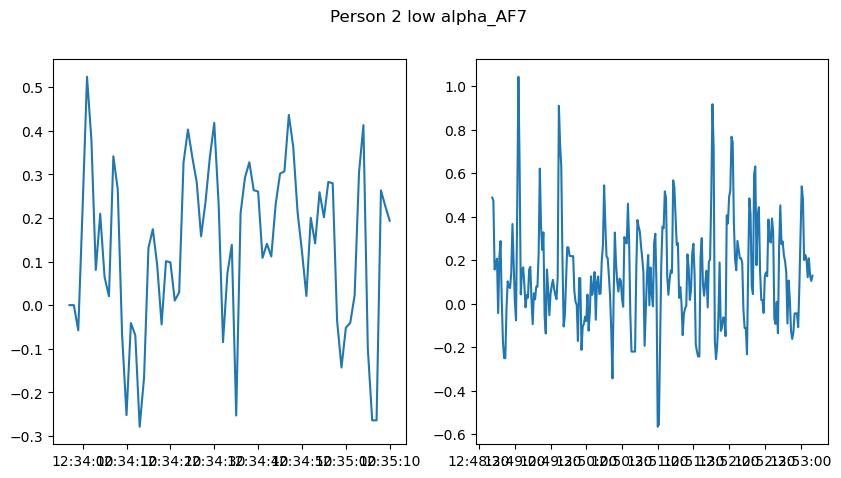

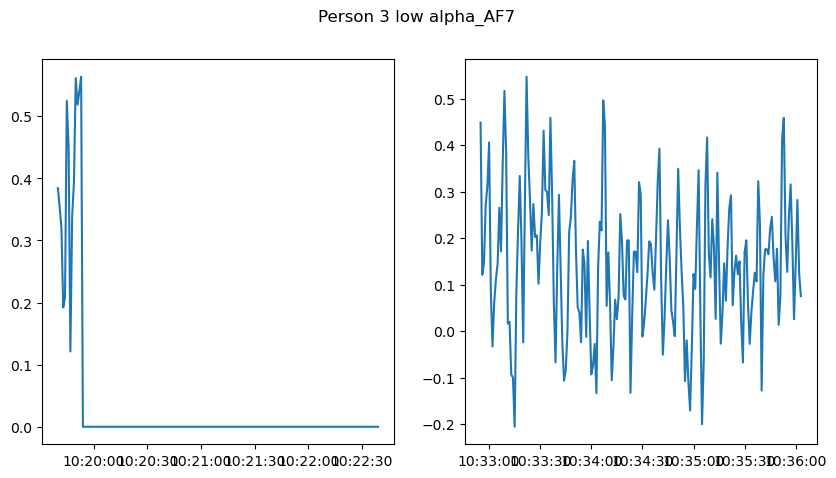

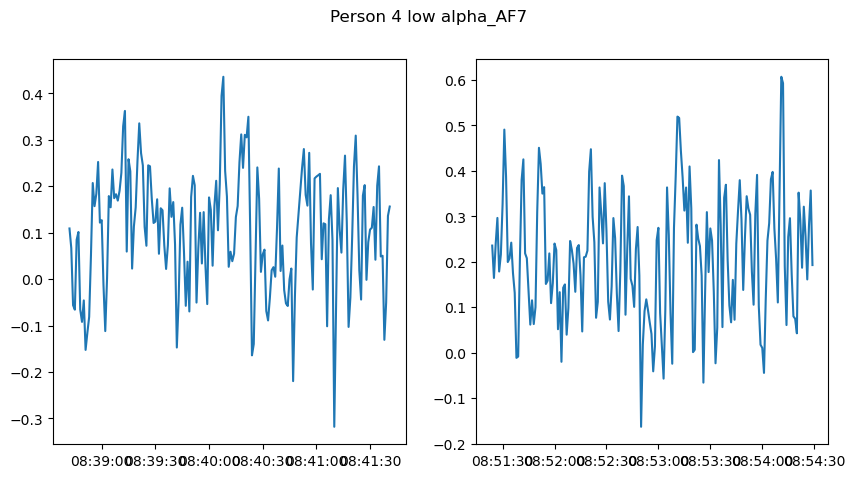

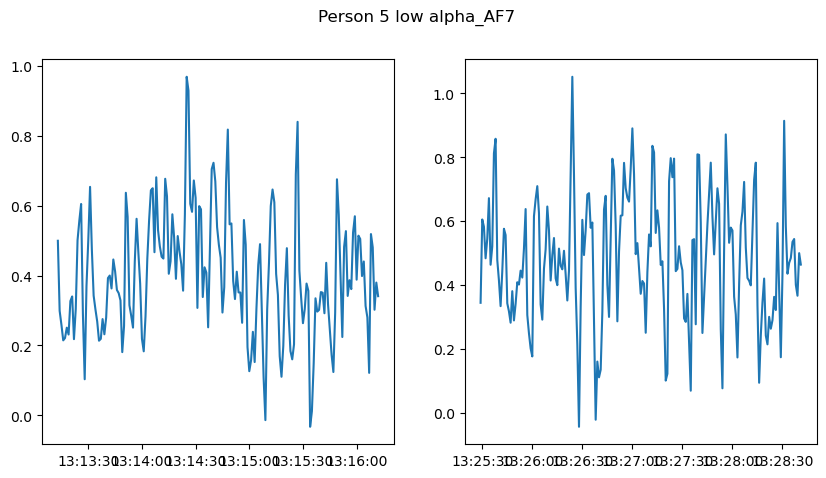

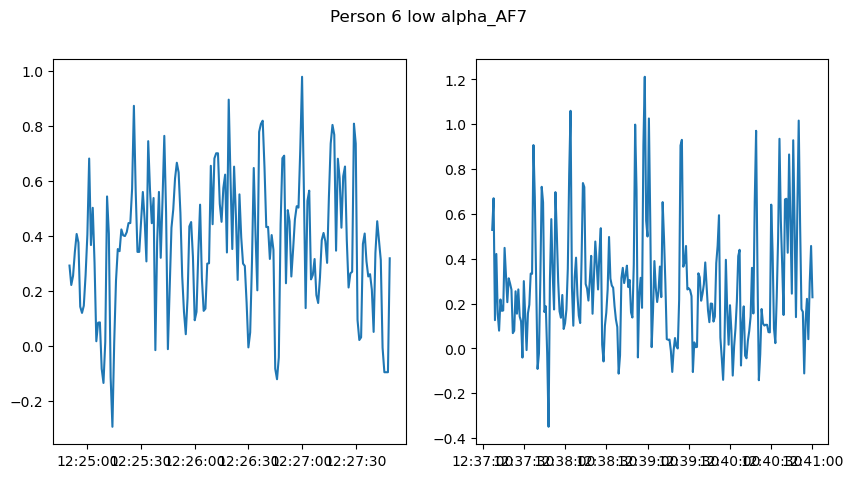

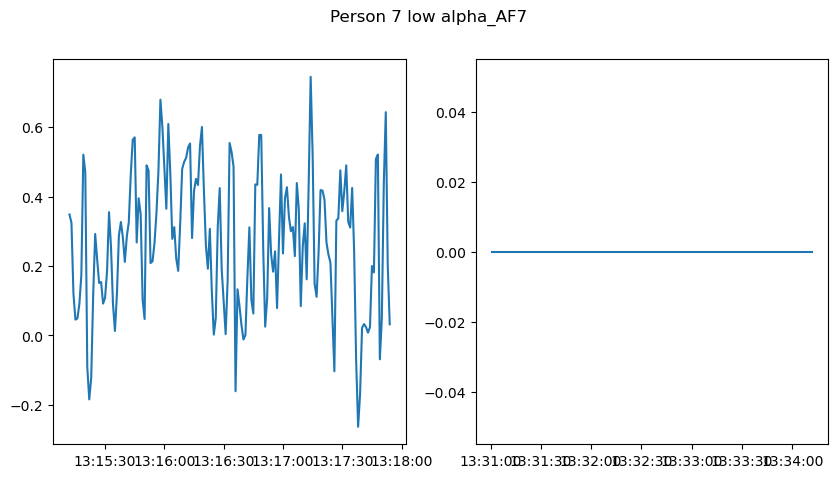

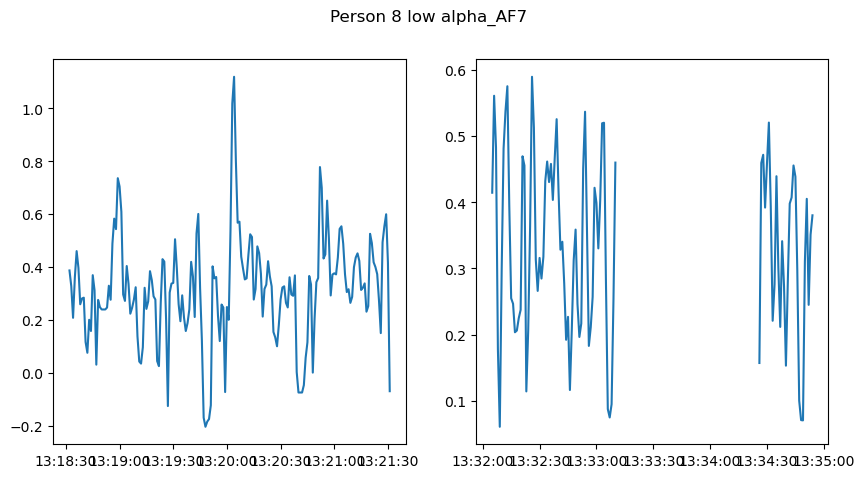

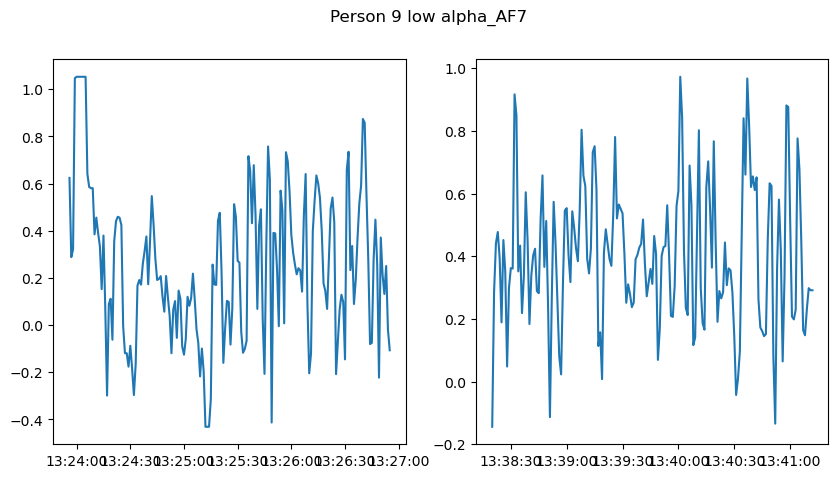

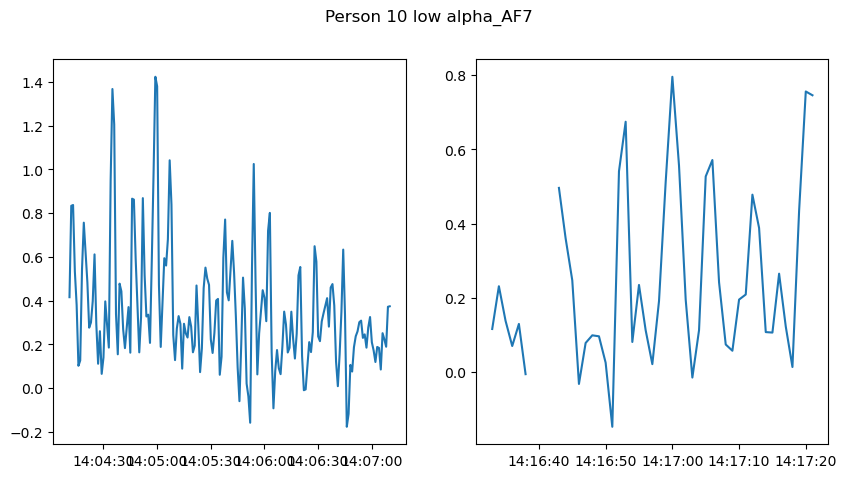

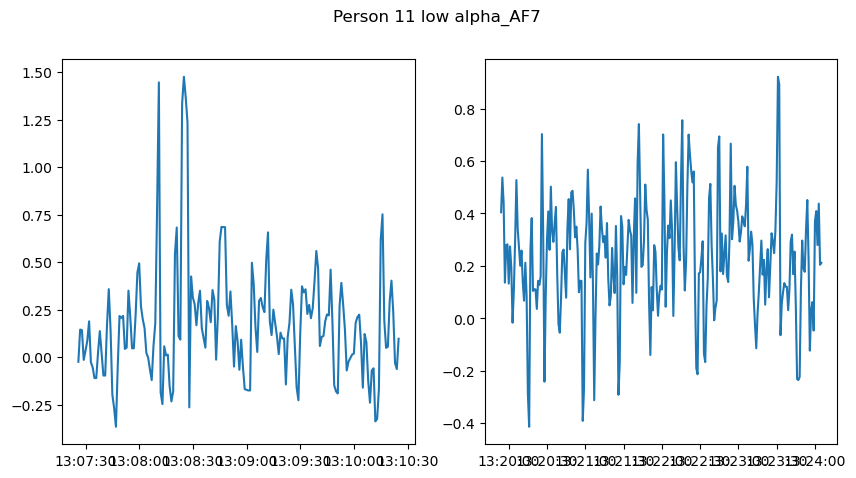

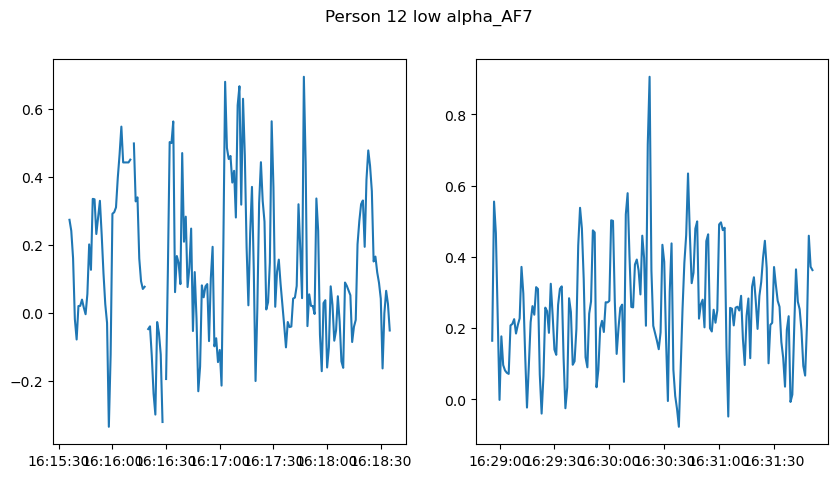

In [20]:
# full_experiment_data is now ready for analysis with NaNs dropped


# Plot by
feature = 'alpha_AF7'
session = 'low'

# For each person, ONLY LOW SESSION, plot beta_AF7 in baseline and experimental condition
for person in range(1, 13):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    person_data = full_experimental_data[(full_experimental_data['person'] == person) & (full_experimental_data['Session'] == session)]
    # plot baseline and experimental
    person_baseline = person_data[person_data['experimental'] == 0]
    person_experimental = person_data[person_data['experimental'] == 1]

    if person_baseline.iloc[0]['Faulty'] > 0:
        continue


    # plot both
    ax[0].plot(person_baseline[feature], label='Baseline')
    ax[1].plot(person_experimental[feature], label='Experimental')
    plt.suptitle(f'Person {person} {session} {feature}')
    plt.show()
    

Lots of interpolation needed

In [21]:
person = 10
session = 'low'
person, session = remap_person_and_session(person, session)

path = os.path.join(FATIGUESET_AGG_DIRECTORY, f"{person}_data.csv")

x = pd.read_csv(path, parse_dates=['DateTime'], index_col='DateTime')

# select from x where Session=session
x = x[x['Session'] == session]

x = x[['alpha_AF7', 'alpha_AF8', 'alpha_TP9', 'alpha_TP10']]

start_experiment = get_time_of_event('start_experiment', person, session)

end_experiment = get_time_of_event('end_session', person, session)

x = x[(x.index >= start_experiment) & (x.index <= end_experiment)]

x

,alpha_AF7,alpha_AF8,alpha_TP9,alpha_TP10
DateTime,,,,
2021-09-07 14:04:10,0.353512,0.030764,0.801886,0.579346
2021-09-07 14:04:11,0.415637,0.018195,0.690288,0.561872
2021-09-07 14:04:12,0.833797,-0.014215,0.633547,0.521920
2021-09-07 14:04:13,0.837419,0.308514,0.633547,0.503693
2021-09-07 14:04:14,0.533524,0.242897,0.633547,0.357870
...,...,...,...,...
2021-09-07 14:21:32,0.161252,-0.030123,0.000000,0.463178
2021-09-07 14:21:33,0.052232,-0.092841,0.000000,0.613754
2021-09-07 14:21:34,0.109678,-0.081941,0.000000,0.767698


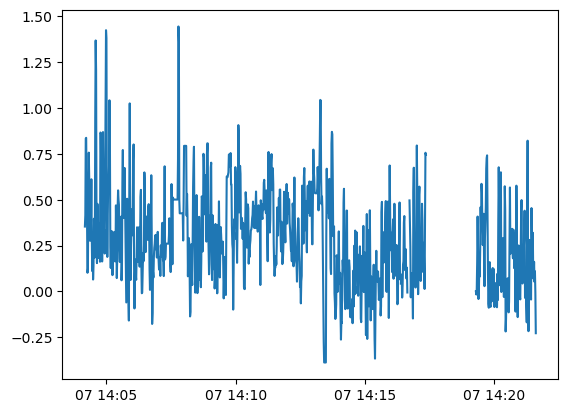

In [22]:
plt.plot(x['alpha_AF7'])
plt.show()

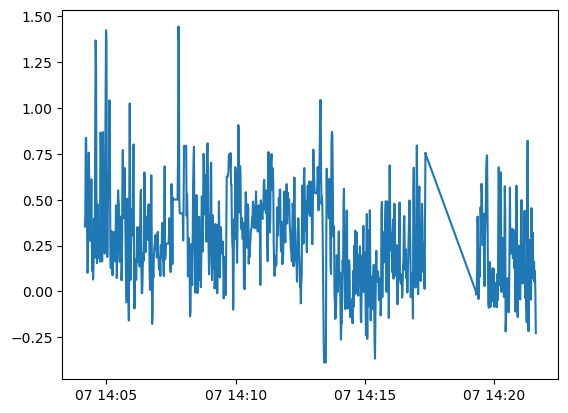

In [23]:
x['alpha_AF7'] = x['alpha_AF7'].interpolate(method='time')

plt.plot(x['alpha_AF7'])
plt.show()

In [24]:
def interpolate_bad_segments(raw):
    raw_interpolated = raw.copy()
    data = raw_interpolated.get_data()
    times = raw_interpolated.times
    
    # Get the index of the AF7 channel
    af7_index = raw.ch_names.index('AF7')

    for annot in raw.annotations:
        if annot['description'] == 'BAD_NaN_AF7':
            start_idx = raw.time_as_index(annot['onset'])[0]
            end_idx = raw.time_as_index(annot['onset'] + annot['duration'])[0]
            
            if start_idx > 0 and end_idx < len(times) - 1:
                data[af7_index, start_idx:end_idx] = np.interp(
                    times[start_idx:end_idx],
                    [times[start_idx-1], times[end_idx]],
                    [data[af7_index, start_idx-1], data[af7_index, end_idx]]
                )

    raw_interpolated._data = data
    return raw_interpolated

In [25]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
data = x.values.T
ch_names = x.columns.tolist()
ch_names = ['AF7', 'AF8', 'TP9', 'TP10']
ch_types = ['eeg'] * len(ch_names)


sfreq = 1 / (x.index[1] - x.index[0]).total_seconds()


info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Define the positions for the electrodes
dig_ch_pos = {
    'AF7': [0.359, 0.094, -0.869],
    'AF8': [0.359, -0.094, -0.869],
    'TP9': [-0.359, 0.094, -0.869],
    'TP10': [-0.359, -0.094, -0.869],
}
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos, coord_frame='head')
info.set_montage(montage)


raw = mne.io.RawArray(data, info)
raw.set_meas_date(x.index[0].timestamp())



def find_flat_segments(data, threshold=1e-6):
    diff = np.abs(np.diff(data))
    is_flat = np.concatenate(([False], diff < threshold, [False]))
    flat_starts = np.where(~is_flat[:-1] & is_flat[1:])[0]
    flat_ends = np.where(is_flat[:-1] & ~is_flat[1:])[0]
    return list(zip(flat_starts, flat_ends))

# Find NaN and flat segments for each channel
bad_annotations = mne.Annotations(onset=[], duration=[], description=[])
for i, ch_name in enumerate(ch_names):
    ch_data = data[i]
    nan_mask = np.isnan(ch_data)
    nan_indices = np.where(nan_mask)[0]
    flat_segments = find_flat_segments(ch_data)

    # # Add annotations for NaN segments
    if nan_indices.size > 0:
        nan_starts = nan_indices[np.insert(np.diff(nan_indices) > 1, 0, True)]
        nan_ends = nan_indices[np.append(np.diff(nan_indices) > 1, True)]
        for start, end in zip(nan_starts, nan_ends):
            onset = raw.times[start]
            duration = raw.times[end] - raw.times[start]
            bad_annotations.append(onset=onset, duration=duration, description=f'BAD_NaN_{ch_name}')

    # Add annotations for flat segments
    # for start, end in flat_segments:
    #     onset = raw.times[start]
    #     duration = raw.times[end] - raw.times[start]
    #     bad_annotations.append(onset=onset, duration=duration, description=f'BAD_flat_{ch_name}')


# # Add the annotations to the raw object
raw.set_annotations(bad_annotations)
raw.info['bads'] = ['AF7']

# raw.plot()

# Plot the original data with annotations
raw.plot(duration = 60, time_format='%Y-%m-%d %H:%M:%S', scalings={'eeg' : 50e-2})

# make a new raw object that has the bad annotations interpolated
# raw_interpolated = raw.copy().interpolate_bads(reset_bads=True, method='spline', origin=(0,0,0), verbose=True)
raw_interpolated = interpolate_bad_segments(raw)

# Plot the interpolated data
raw_interpolated.plot(duration = 60, time_format='%Y-%m-%d %H:%M:%S', scalings='auto')



# turn raw interpolated into a df
# af = raw.get_data(picks=['AF7']).flatten()
# af = pd.Series(af)
# display(af)
# plt.plot(af)
# plt.show()

None

Creating RawArray with float64 data, n_channels=4, n_times=1047
    Range : 0 ... 1046 =      0.000 ...  1046.000 secs
Ready.
Using qt as 2D backend.


ok


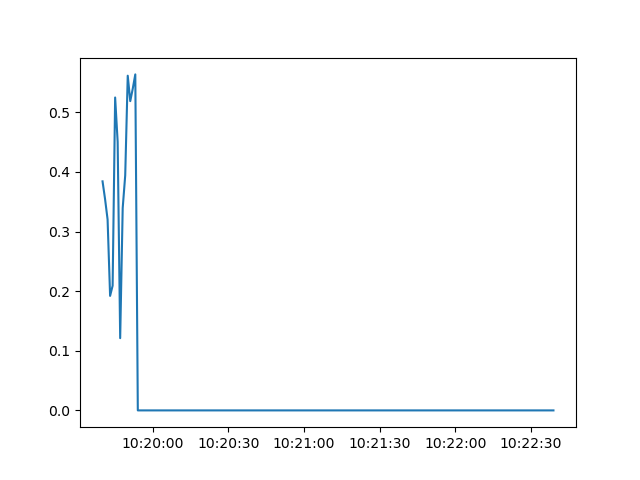

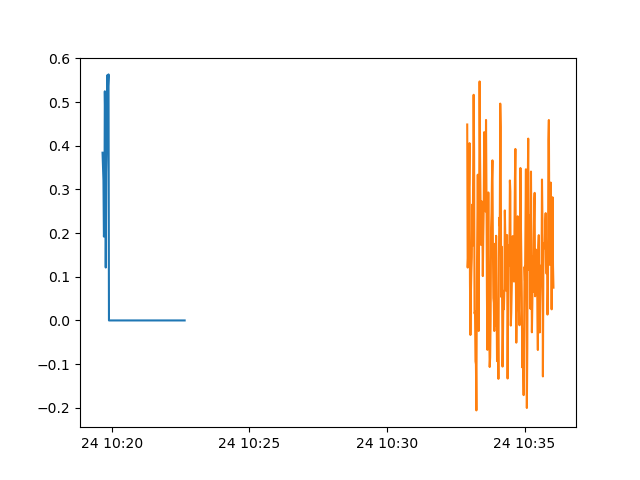

,person,Session,alpha_TP9,alpha_AF7,alpha_AF8,alpha_TP10,beta_TP9,beta_AF7,beta_AF8,beta_TP10,theta_TP9,theta_AF7,theta_AF8,theta_TP10,wrist_hr,Faulty,experimental
DateTime,,,,,,,,,,,,,,,,,
2021-08-24 10:19:40,3,low,0.459978,0.384158,0.502886,0.739026,0.824171,0.276353,0.049304,0.605627,0.493612,0.764736,0.909969,0.823788,78.55,0,0
2021-08-24 10:19:41,3,low,0.459978,0.354399,0.660709,0.739026,0.824171,0.190211,0.168880,0.605627,0.493612,0.256712,0.899167,0.823788,78.67,0,0
2021-08-24 10:19:42,3,low,0.459978,0.320225,0.844720,0.739026,0.824171,0.257188,0.187838,0.605627,0.493612,0.009130,0.809848,0.823788,78.75,0,0
2021-08-24 10:19:43,3,low,0.899638,0.192066,0.710023,0.739026,0.972831,0.329088,0.332369,0.605627,0.902232,-0.199890,0.622884,0.823788,78.78,0,0
2021-08-24 10:19:44,3,low,1.156706,0.209128,0.804618,1.109007,1.126465,0.359439,0.486013,1.185507,1.172708,-0.047561,0.675367,1.137648,78.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 10:35:59,3,low,0.823759,0.025420,0.076752,0.761249,0.428666,-0.016757,0.134800,0.579172,0.860567,-0.126120,0.287224,0.682073,78.43,0,1
2021-08-24 10:36:00,3,low,0.823759,0.147299,0.072963,0.761249,0.428666,0.067440,0.134574,0.579172,0.860567,-0.030007,0.287707,0.682073,78.55,0,1
2021-08-24 10:36:01,3,low,0.823759,0.282169,0.072963,0.761249,0.428666,0.149710,0.134574,0.579172,0.860567,0.085265,0.287707,0.682073,78.67,0,1


In [ ]:
p3_low = full_experimental_data[(full_experimental_data['person'] == 3) & (full_experimental_data['Session'] == 'low')]

p3_low

# plot baseline and experimental
p3_baseline = p3_low[p3_low['experimental'] == 0]
p3_experimental = p3_low[p3_low['experimental'] == 1]

# find mode of p3_baseline
mode = p3_baseline['alpha_AF7'].mode()[0]

# drop if mode is 90% of the data
mode_count = p3_baseline['alpha_AF7'].value_counts()[mode]
if mode_count > 0.9 * p3_baseline.shape[0]:
    print('ok')



# plot both
plt.plot(p3_baseline['alpha_AF7'], label='Baseline')
plt.show()
plt.plot(p3_experimental['alpha_AF7'], label='Experimental')
plt.show()

display(p3_low)

# Not sure, but this might show that there is a stark difference in alpha_AF7 between baseline and experimental conditions

In [ ]:
from scipy import stats

# 3. Perform statistical tests
def paired_ttest(group):
    baseline = group[group['experimental'] == 0]['alpha_AF7']
    experimental = group[group['experimental'] == 1]['alpha_AF7']

    # if baseline and experimental are unequal, chop off the extra of the longer one
    if len(baseline) > len(experimental):
        baseline = baseline[:len(experimental)]
    elif len(experimental) > len(baseline):
        experimental = experimental[:len(baseline)]

    t_stat, p_value = stats.ttest_rel(baseline, experimental)
    return pd.Series({'t_statistic': t_stat, 'p_value': p_value})

results = full_experimental_data.groupby(['person', 'Session']).apply(paired_ttest).reset_index()

display(results)



C:\Users\639766\AppData\Local\Temp\ipykernel_19512\1010399539.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = full_experimental_data.groupby(['person', 'Session']).apply(paired_ttest).reset_index()


,person,Session,t_statistic,p_value
0,1,high,21.955829,1.152051e-52
1,1,low,-4.694007,5.291197e-06
2,1,medium,0.938479,3.492628e-01
3,2,high,-5.417802,1.926426e-07
4,2,low,NaN,NaN
5,2,medium,-2.565108,1.116315e-02
6,3,high,11.338580,7.835453e-23
7,3,low,-8.579231,4.457522e-15
8,3,medium,-0.945139,3.459138e-01
9,4,high,NaN,NaN


# Resample to ensure each time series is the same length

In [ ]:
full_experimental_data


# Drop all rows with Faulty == 1
full_experimental_data = full_experimental_data[full_experimental_data['Faulty'] == 0]




# Find the lowest amount of rows for a person / session combo
min_rows = full_experimental_data.groupby(['person', 'Session']).size().min()

# Limit each person / session combo to that min_rows amount
data = full_experimental_data.groupby(['person', 'Session']).apply(lambda x: x.iloc[:min_rows]).drop(columns=['person', 'Session'])


data



C:\Users\639766\AppData\Local\Temp\ipykernel_19512\4127767310.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = full_experimental_data.groupby(['person', 'Session']).apply(lambda x: x.iloc[:min_rows]).drop(columns=['person', 'Session'])


alpha_TP9  alpha_AF7  alpha_AF8  \
person Session DateTime                                               
1      high    2021-09-02 09:08:19   0.629521   0.426734   0.038355   
               2021-09-02 09:08:20   0.827554   0.426734   0.039634   
               2021-09-02 09:08:21   1.034175   0.426734  -0.027832   
               2021-09-02 09:08:22   0.989508   0.426734  -0.164011   
               2021-09-02 09:08:23   0.545127   0.426734  -0.195369   
...                                       ...        ...        ...   
12     medium  2021-09-08 16:45:11   0.471692  -0.028898   0.407516   
               2021-09-08 16:45:12   0.728904  -0.054678   0.333179   
               2021-09-08 16:45:13   0.580864  -0.019491   0.344964   
               2021-09-08 16:45:14   0.757714  -0.179518   0.455002   
               2021-09-08 16:45:15   0.857055  -0.132383   0.528647   

                                    alpha_TP10  beta_TP9  beta_AF7  beta_AF8  \
person Session DateTime                                                        
1      high    2021-09-02 09:08:19    0.388580  0.438227  0.842039  0.070448   
               2021-09-02 09:08:20    0.565776  0.643323  0.842039  0.014307   
               2021-09-02 09:08:21    0.545647  0.767581  0.842039  0.162297   
               2021-09-02 09:08:22    0.244589  0.595977  0.842039  0.182729   
               2021-09-02 09:08:23    0.322142  0.437197  0.842039  0.138228   
...                                        ...       ...       ...       ...   
12     medium  2021-09-08 16:45:11    0.672208  0.350050 -0.075914  0.007269   
               2021-09-08 16:45:12    0.654279  0.426050 -0.164555 -0.060946   
               2021-09-08 16:45:13    0.710255  0.326576 -0.247386 -0.040877   
               2021-09-08 16:45:14    0.915648  0.294904 -0.227035 -0.080929   
               2021-09-08 16:45:15    0.946564  0.395555 -0.209815 -0.067487   

                                    beta_TP10  theta_TP9  theta_AF7  \
person Session DateTime                                               
1      high    2021-09-02 09:08:19   0.456491  -0.091543   0.497552   
               2021-09-02 09:08:20   0.518144   0.465887   0.497552   
               2021-09-02 09:08:21   0.578512   0.809673   0.497552   
               2021-09-02 09:08:22   0.655481   0.616058   0.497552   
               2021-09-02 09:08:23   0.575409   0.359282   0.497552   
...                                       ...        ...        ...   
12     medium  2021-09-08 16:45:11   0.690046  -0.019189  -0.542747   
               2021-09-08 16:45:12   0.727280   0.551573  -0.497018   
               2021-09-08 16:45:13   0.716990   0.393311  -0.395346   
               2021-09-08 16:45:14   0.668171   0.631263  -0.225886   
               2021-09-08 16:45:15   0.784559   1.009264  -0.097880   

                                    theta_AF8  theta_TP10  wrist_hr  Faulty  \
person Session DateTime                                                       
1      high    2021-09-02 09:08:19  -0.439057   -0.235839     72.78       0   
               2021-09-02 09:08:20  -0.248329    0.444617     72.65       0   
               2021-09-02 09:08:21  -0.057430    0.855137     72.50       0   
               2021-09-02 09:08:22  -0.115724    0.367946     72.33       0   
               2021-09-02 09:08:23  -0.333443    0.152769     72.12       0   
...                                       ...         ...       ...     ...   
12     medium  2021-09-08 16:45:11   0.691363    0.377205     77.90       0   
               2021-09-08 16:45:12   0.508638    0.376260     77.68       0   
               2021-09-08 16:45:13   0.210739    0.434681     77.47       0   
               2021-09-08 16:45:14   0.528715    0.623940     77.27       0   
               2021-09-08 16:45:15   1.012747    0.889836     77.05       0   

                                    experimental  
person Session DateTime                           
1      high    20

In [ ]:
# grab all rows where experimental == 1
experimental_data = data[data['experimental'] == 1].drop(columns=['experimental'])

# grab all rows where experimental == 0
baseline_data = data[data['experimental'] == 0].drop(columns=['experimental'])

display(experimental_data)

alpha_TP9  alpha_AF7  alpha_AF8  \
person Session DateTime                                               
1      high    2021-09-02 09:22:19   0.811317   0.845404   0.620388   
               2021-09-02 09:22:20   0.727367   0.228423   0.201890   
               2021-09-02 09:22:21   0.846684   0.263796   0.174908   
               2021-09-02 09:22:22   0.872533   0.256223   0.138149   
               2021-09-02 09:22:23   0.661129   0.268344   0.069938   
...                                       ...        ...        ...   
12     medium  2021-09-08 16:45:11   0.471692  -0.028898   0.407516   
               2021-09-08 16:45:12   0.728904  -0.054678   0.333179   
               2021-09-08 16:45:13   0.580864  -0.019491   0.344964   
               2021-09-08 16:45:14   0.757714  -0.179518   0.455002   
               2021-09-08 16:45:15   0.857055  -0.132383   0.528647   

                                    alpha_TP10  beta_TP9  beta_AF7  beta_AF8  \
person Session DateTime                                                        
1      high    2021-09-02 09:22:19    0.351580  0.686065  0.379749  0.577279   
               2021-09-02 09:22:20    0.440819  0.619938  0.255901  0.344013   
               2021-09-02 09:22:21    0.285183  0.767509  0.271823  0.366614   
               2021-09-02 09:22:22    0.200762  0.797548  0.305826  0.396872   
               2021-09-02 09:22:23    0.139496  0.599054  0.372742  0.410051   
...                                        ...       ...       ...       ...   
12     medium  2021-09-08 16:45:11    0.672208  0.350050 -0.075914  0.007269   
               2021-09-08 16:45:12    0.654279  0.426050 -0.164555 -0.060946   
               2021-09-08 16:45:13    0.710255  0.326576 -0.247386 -0.040877   
               2021-09-08 16:45:14    0.915648  0.294904 -0.227035 -0.080929   
               2021-09-08 16:45:15    0.946564  0.395555 -0.209815 -0.067487   

                                    beta_TP10  theta_TP9  theta_AF7  \
person Session DateTime                                               
1      high    2021-09-02 09:22:19   0.347213   1.012679   0.483793   
               2021-09-02 09:22:20   0.368374   0.929813   0.021669   
               2021-09-02 09:22:21   0.354264   0.594310  -0.137761   
               2021-09-02 09:22:22   0.344204   0.564590  -0.304865   
               2021-09-02 09:22:23   0.360927   0.601677   0.064603   
...                                       ...        ...        ...   
12     medium  2021-09-08 16:45:11   0.690046  -0.019189  -0.542747   
               2021-09-08 16:45:12   0.727280   0.551573  -0.497018   
               2021-09-08 16:45:13   0.716990   0.393311  -0.395346   
               2021-09-08 16:45:14   0.668171   0.631263  -0.225886   
               2021-09-08 16:45:15   0.784559   1.009264  -0.097880   

                                    theta_AF8  theta_TP10  wrist_hr  Faulty  
person Session DateTime                                                      
1      high    2021-09-02 09:22:19   0.362899    0.191110     75.50       0  
               2021-09-02 09:22:20  -0.201328   -0.087652     75.50       0  
               2021-09-02 09:22:21  -0.107066    0.354090     75.50       0  
               2021-09-02 09:22:22  -0.191701    0.498612     75.50       0  
               2021-09-02 09:22:23  -0.108625    0.101979     75.50       0  
...                                       ...         ...       ...     ...  
12     medium  2021-09-08 16:45:11   0.691363    0.377205     77.90       0  
               2021-09-08 16:45:12   0.508638    0.376260     77.68       0  
               2021-09-08 16:45:13   0.210739    0.434681     77.47       0  
               2021-09-08 16:45:14   0.528715    0.623940     77.27       0  
               2021-09-08 16:45:15   1.012747    0.889836     77.05       0  

[4524 rows x 14 columns]

In [ ]:
data

# group by person and session
grouped = data.groupby(['person', 'Session'])

# grab baseline
baseline = grouped.apply(lambda x: x[x['experimental'] == 0])

baseline

alpha_TP9  alpha_AF7  \
person Session person Session DateTime                                    
1      high    1      high    2021-09-02 09:08:19   0.629521   0.426734   
                              2021-09-02 09:08:20   0.827554   0.426734   
                              2021-09-02 09:08:21   1.034175   0.426734   
                              2021-09-02 09:08:22   0.989508   0.426734   
                              2021-09-02 09:08:23   0.545127   0.426734   
...                                                      ...        ...   
12     medium  12     medium  2021-09-08 16:27:27   2.560209   2.261077   
                              2021-09-08 16:27:28   2.560209   1.989047   
                              2021-09-08 16:27:29   2.560209   1.825187   
                              2021-09-08 16:27:30   2.560209   2.050751   
                              2021-09-08 16:27:31   2.560209   2.162307   

                                                   alpha_AF8  alpha_TP10  \
person Session person Session DateTime                                     
1      high    1      high    2021-09-02 09:08:19   0.038355    0.388580   
                              2021-09-02 09:08:20   0.039634    0.565776   
                              2021-09-02 09:08:21  -0.027832    0.545647   
                              2021-09-02 09:08:22  -0.164011    0.244589   
                              2021-09-02 09:08:23  -0.195369    0.322142   
...                                                      ...         ...   
12     medium  12     medium  2021-09-08 16:27:27   1.777732    2.093706   
                              2021-09-08 16:27:28   1.231079    2.093706   
                              2021-09-08 16:27:29   0.562142    1.905165   
                              2021-09-08 16:27:30   1.158204    1.528081   
                              2021-09-08 16:27:31   1.322154    1.528081   

                                                   beta_TP9  beta_AF7  \
person Session person Session DateTime                                  
1      high    1      high    2021-09-02 09:08:19  0.438227  0.842039   
                              2021-09-02 09:08:20  0.643323  0.842039   
                              2021-09-02 09:08:21  0.767581  0.842039   
                              2021-09-02 09:08:22  0.595977  0.842039   
                              2021-09-02 09:08:23  0.437197  0.842039   
...                                                     ...       ...   
12     medium  12     medium  2021-09-08 16:27:27  1.913955  1.398335   
                              2021-09-08 16:27:28  1.977155  1.157238   
                              2021-09-08 16:27:29  1.977155  0.953855   
                              2021-09-08 16:27:30  1.977155  1.177487   
                              2021-09-08 16:27:31  1.977155  1.130866   

                                                   beta_AF8  beta_TP10  \
person Session person Session DateTime                                   
1      high    1      high    2021-09-02 09:08:19  0.070448   0.456491   
                              2021-09-02 09:08:20  0.014307   0.518144   
                              2021-09-02 09:08:21  0.162297   0.578512   
                              2021-09-02 09:08:22  0.182729   0.655481   
                              2021-09-02 09:08:23  0.138228   0.575409   
...                                                     ...        ...   
12     medium  12     medium  2021-09-08 16:27:27  0.963078   1.536532   
                              2021-09-08 16:27:28  0.695822   1.613305   
                              2021-09-08 16:27:29  0.100731   1.397793   
                              2021-09-08 16:27:30  0.596186   0.966768   
                              2021-09-08 16:27:31  0.804751   0.966768   

                                                   theta_TP9  theta_AF7  \
person Session person Session DateTime                                    
1      high    1      h

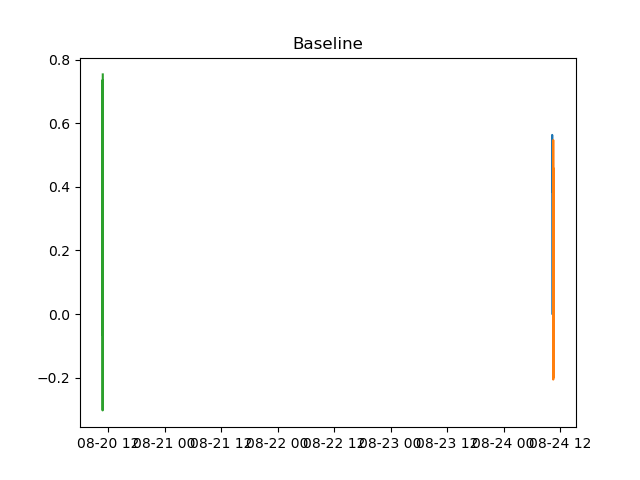

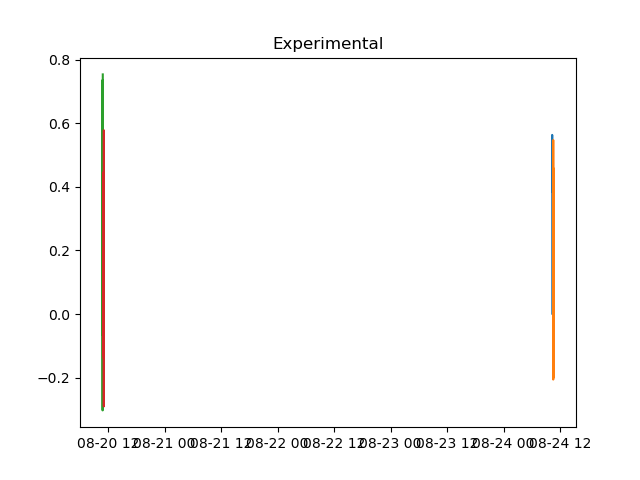

In [ ]:
# Plot person 1 session 1 baseline and experimental
person_data = full_experimental_data[(full_experimental_data['person'] == 3) 
                                     & (full_experimental_data['Session'] == 'high')]
baseline = person_data[person_data['experimental'] == 0]
experimental = person_data[person_data['experimental'] == 1]

plt.plot(baseline['alpha_AF7'], label='Baseline')
plt.title('Baseline')
plt.show()
plt.plot(experimental['alpha_AF7'], label='Experimental')
plt.title('Experimental')
plt.show()

In [ ]:
# Do Granger causality test


full_experimental_data

# Grab only expeirmental, person, alpha af7, and session
data = full_experimental_data[['experimental', 'person', 'alpha_AF7', 'Session']].copy()

# Make new df with multi index, person session and experimental
data.set_index(['person', 'Session', 'experimental'], inplace=True)

# I want to split this into X and y for sktime
# X is alpha_AF7
# y is experimental
# I want to classify if alpha_AF7 readings are from baseline or experimental
# I want to use sktime to do this
display(data)

print(data.shape)
baseline = data.xs(0, level='experimental')
experimental = data.xs(1, level='experimental')

display(baseline)
display(experimental)



assert baseline.index.equals(experimental.index)

# # Split into X and y
# X = data['alpha_AF7']
# y = data['experimental']

# # Split into training and testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# # Convert to sktime format
# from sktime.utils.data_processing import from_2d_array_to_nested
# from sktime.datasets import load_from_tsfile_to_dataframe
# X_train_nested = from_2d_array_to_nested(X_train)
# X_test_nested = from_2d_array_to_nested(X_test)

# # Fit a classifier
# from sktime.classification.compose import TimeSeriesForestClassifier
# classifier = TimeSeriesForestClassifier()
# classifier.fit(X_train_nested, y_train)

# # Predict
# y_pred = classifier.predict(X_test_nested)


# # Evaluate
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)




alpha_AF7
person Session experimental           
1      low     0              0.238651
               0              0.355870
               0              0.375379
               0              0.317509
               0              0.175428
...                                ...
12     high    1              0.094437
               1             -0.039492
               1              0.218234
               1              0.266438
               1              0.345213

[14925 rows x 1 columns]

(14925, 1)


alpha_AF7
person Session           
1      low       0.238651
       low       0.355870
       low       0.375379
       low       0.317509
       low       0.175428
...                   ...
12     high      0.160354
       high      0.198814
       high      0.534645
       high      0.515530
       high      0.392135

[6492 rows x 1 columns]

alpha_AF7
person Session           
1      low       0.536767
       low       0.765776
       low       0.541239
       low       1.145887
       low       1.032043
...                   ...
12     high      0.094437
       high     -0.039492
       high      0.218234
       high      0.266438
       high      0.345213

[8433 rows x 1 columns]

AssertionError: 

Channels marked as bad:
['AF7']
Channels marked as bad:
['AF7']


In [ ]:
aa = {
    ('person1', 'low', 0): [1.1, 2.1, 3.1],
    ('person1', 'low', 1): [1.2, 2.2, 3.2],
    ('person1', 'medium', 0): [1.3, 2.3, 3.3],
    ('person1', 'medium', 1): [1.4, 2.4, 3.4],
    ('person2', 'high', 0): [1.5, 2.5, 3.5],
    ('person2', 'high', 1): [1.6, 2.6, 3.6],
}
index = pd.MultiIndex.from_tuples(aa.keys(), names=['person', 'session', 'experimental'])
df = pd.DataFrame(list(aa.values()), index=index, columns=['alpha_AF7'])

display(df)

ValueError: 1 columns passed, passed data had 3 columns

<hr>

# Below is old functions before data was compiled into aggregated folder, not much usability

In [ ]:


###### Depreciated
# def plot_series_in_bounds(person, session, start, end):
#     utc_start = find_utc_time_for_event(start, person, session)
#     utc_end = find_utc_time_for_event(end, person, session)

#     df = get_forehead_eeg_alpha_abs(person, session)


#     df = df[(df.index > utc_start) & (df.index < utc_end)]

#     sns.lineplot(x='timestamp', y='TP9', data=df)

#     # Rotate x-axis labels for better readability
#     plt.xticks(rotation=45)

#     # Add labels and title
#     plt.xlabel('Date')
#     plt.ylabel('Value')
#     plt.title('Time Series Data')
#     # plt.xlim(utc_start, utc_end)

#     # Display the plot
#     plt.show()

def get_savgol_filtered_series(df, target, window_length=500, polyorders = 3):
    """Given whole df and target, applies filter and
    RETURNS: Series of timestamp,target"""
    filtered_data = savgol_filter(df[target], window_length=window_length, polyorder=polyorders)

    data = pd.Series(filtered_data, index=df.index, name=f'{df.name}_filtered')

    return data

def plot_filtered_series(df_raw, target_wave):
    """DF IS COMPLETE"""
    filtered_data = get_savgol_filtered_series(df_raw,target_wave, window_length=100)

    data = pd.Series(filtered_data, index=df_raw.index, name=f'{df_raw.name}_filtered')

    sns.lineplot(data)
    plt.title(f'Filtered {target_wave} data')
    plt.show()

def plot_raw_series(df_raw, target_wave):
    data = df_raw[target_wave] if target_wave != None else df_raw

    sns.lineplot(data)
    plt.title(f'Raw {target_wave} data')
    plt.show()


# NOTE: Below functions do the same thing
# plot_filtered_series(baseline_raw, 'TP9')
#   and
# baseline_filtered = get_savgol_filtered_series(baseline_raw, 'TP9', 100)
# plot_raw_series(baseline_filtered, 'TP9')

def slice_df(df, start_marker, end_marker):
    namee = df.name
    person, session = df.name.split('-')
    utc_start = find_utc_time_for_event(start_marker, person, session)
    utc_end = find_utc_time_for_event(end_marker, person, session)



    df = df[(df.index > utc_start) & (df.index < utc_end)]
    df.name = namee
    

    return df

def get_peaks_series(df, prominence):
    """Df should probably be filtered..."""
    peak_indices, _ = find_peaks(df, prominence=prominence)

    peak_timestamps = df.index[peak_indices]

    series = df[peak_timestamps]

    return series


In [ ]:
def plot_df(df_raw, target, *, filtered=False, window_size=100, prominence=0.1, title=None):
    """Input: Raw df, target wavelength
    Does: Displays peaks, possibly filtered
    Returns: peaks, filtered df; as peaks won't be on raw df"""
    if filtered:
        df_raw = get_savgol_filtered_series(df_raw, target, window_size)
    else:
        df_raw = df_raw[target]
    peaks = get_peaks_series(df_raw, prominence=prominence)
    plt.plot(df_raw)
    plt.scatter(peaks.index, peaks, color='red')

    # mean_peak_height = peaks.mean()
    # horizontal = False
    # if horizontal:
    #     plt.axhline(mean_peak_height, color='blue', linestyle='dotted')

    plt.title(f'{title} - {target}')
    plt.show()
    return peaks, df_raw

def subplot_df(df1, df2, df3, target_region, *, horizontal=False, filtered=False, window_size=100, prominence=0.1, person=None, session=None, band=None):

    if filtered:
        df1 = get_savgol_filtered_series(df1, target_region, window_size)
        df2 = get_savgol_filtered_series(df2, target_region, window_size)
        df3 = get_savgol_filtered_series(df3, target_region, window_size)
    else:
        df1 = df1[target_region]
        df2 = df2[target_region]
        df3 = df3[target_region]
    peaks1 = get_peaks_series(df1, prominence=prominence)
    peaks2 = get_peaks_series(df2, prominence=prominence)
    peaks3 = get_peaks_series(df3, prominence=prominence)

    fig, axs = plt.subplots(1, 3, figsize=(25, 5))

    axs[0].set_ylim(-1, 2)
    axs[1].set_ylim(-1, 2)
    axs[2].set_ylim(-1, 2)


    if horizontal:
        mean_peak_height = df1.mean()
        axs[0].axhline(mean_peak_height, color='green', linestyle='dotted')
        mean_peak_height = df2.mean()
        axs[1].axhline(mean_peak_height, color='green', linestyle='dotted')
        mean_peak_height = df3.mean()
        axs[2].axhline(mean_peak_height, color='green', linestyle='dotted')



    axs[0].plot(df1)
    axs[0].scatter(peaks1.index, peaks1, color='red')
    axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels for the first subplot
    axs[0].set_title(f'Baseline {band} band in {target_region} region, {person}-{session}')  # Set the title for the first subplot
    axs[1].plot(df2)
    axs[1].scatter(peaks2.index, peaks2, color='red')
    axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels for the second subplot
    axs[1].set_title(f'Fatiguing {band} band in {target_region} region, {person}-{session}')  # Set the title for the second subplot
    axs[2].plot(df3)
    axs[2].scatter(peaks3.index, peaks3, color='red')

    axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels for the third subplot
    axs[2].set_title(f'Measurement 3 {band} band in {target_region} region, {person}-{session}')  # Set the title for the third subplot

    plt.show()
    return df1.mean(), df2.mean(), df3.mean()

# T-Test for Difference Between Baseline and Mental-Fatigue-Inducing Task

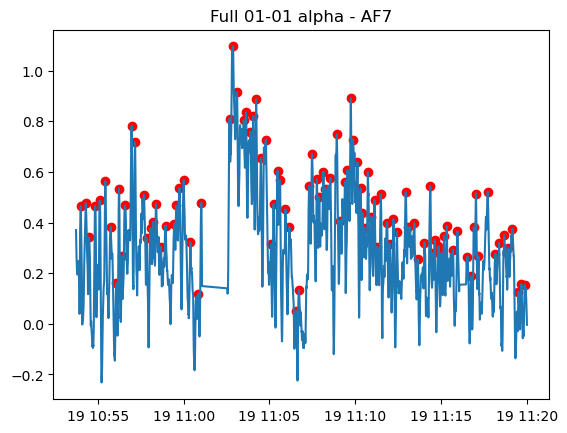

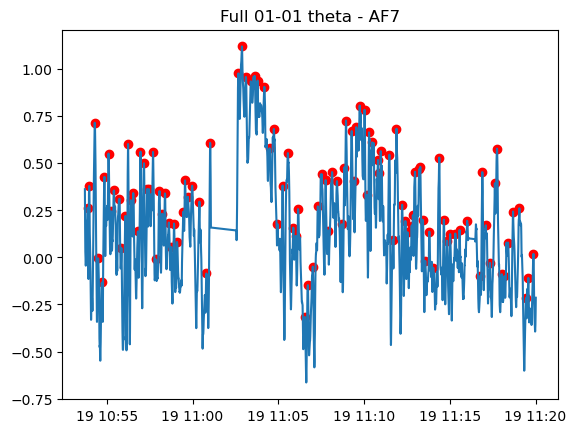

(timestamp
 2021-08-19 10:53:52.858    0.264221
 2021-08-19 10:53:58.094    0.379343
 2021-08-19 10:54:17.438    0.715349
 2021-08-19 10:54:29.515   -0.005184
 2021-08-19 10:54:42.742   -0.132937
                              ...   
 2021-08-19 11:18:41.272    0.243893
 2021-08-19 11:19:03.397    0.260747
 2021-08-19 11:19:26.780   -0.214314
 2021-08-19 11:19:34.674   -0.108982
 2021-08-19 11:19:52.596    0.018925
 Name: 01-01_filtered, Length: 110, dtype: float64,
 timestamp
 2021-08-19 10:53:43.026    0.362509
 2021-08-19 10:53:43.201    0.332363
 2021-08-19 10:53:43.231    0.303581
 2021-08-19 10:53:43.295    0.276140
 2021-08-19 10:53:43.409    0.250015
                              ...   
 2021-08-19 11:20:00.479   -0.270813
 2021-08-19 11:20:00.569   -0.257754
 2021-08-19 11:20:00.694   -0.243947
 2021-08-19 11:20:00.820   -0.229380
 2021-08-19 11:20:00.902   -0.214039
 Name: 01-01_filtered, Length: 14395, dtype: float64)

In [ ]:
alpha_1_1 = get_wavelength_df(1, 1, 'alpha')
theta_1_1 = get_wavelength_df(1, 1, 'theta')
plot_df(alpha_1_1, 'AF7', filtered=True, window_size=100, prominence=0.1, title='Full 01-01 alpha')
plot_df(theta_1_1, 'AF7', filtered=True, window_size=100, prominence=0.1, title='Full 01-01 theta')

In [ ]:

# person = 3
# session = 1


# alpha_1_1 = get_forehead_eeg_alpha_abs(person, session)

# baseline_raw = slice_df(alpha_1_1, 'start_baseline', 'end_baseline')


# measurement_3_raw = slice_df(alpha_1_1, 'end_fatigue', 'end_session')


# plot_raw_series(baseline_raw, 'TP9')

# plot_df(baseline_raw, 'TP9', title='Baseline')

# plot_df(measurement_3_raw, 'TP9', title='Measurement 3')

# display(
#     _get_markers_df(person, session)
# )

# plot_df(alpha_1_1, 'TP9', title='Whole session', filtered=True)


# Plot Raw and Band EEG Data

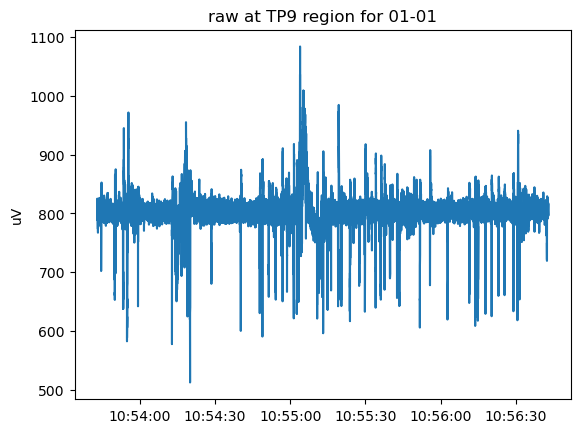

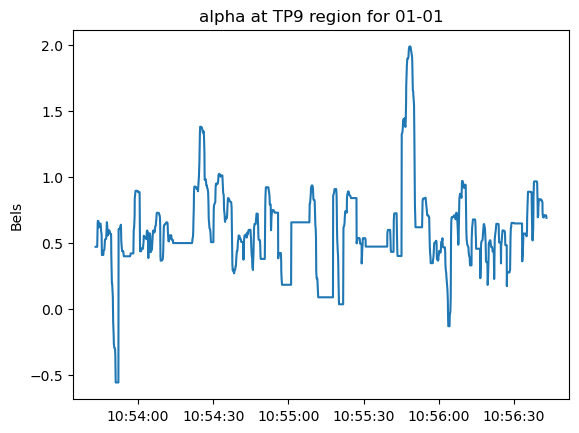

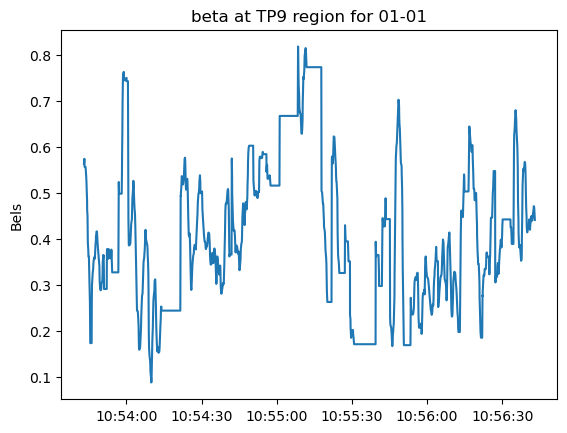

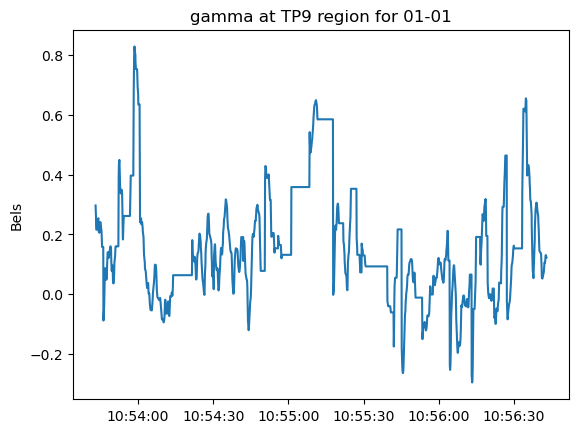

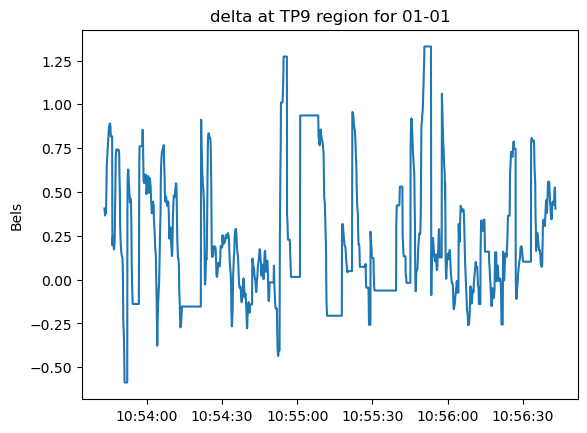

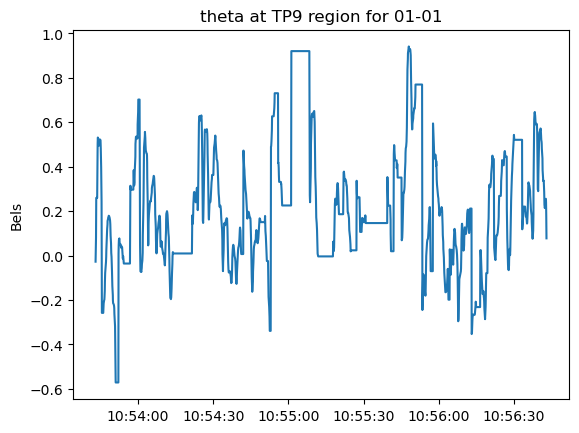

In [ ]:
# Plot raw data
mark1, mark2 = 'start_baseline', 'end_baseline'

target = 'TP9'
for wave in ['raw', 'alpha', 'beta', 'gamma', 'delta', 'theta']:
    data = slice_df(get_wavelength_df(1, 1, wave), mark1, mark2)[target]
    plt.plot(data)
    plt.title(f'{wave} at {target} region for 01-01')
    if wave == 'raw':
        plt.ylabel('uV')
    else:
        plt.ylabel('Bels')
    plt.show()



In [ ]:
# Initialize an empty list to store the data for all participants and sessions
data = []

# Iterate through each participant and session
for person in range(1, 13):  # 12 participants
    for session in range(1, 4):  # 3 sessions per participant
        # Define event markers
        start_baseline = 'start_baseline'
        end_baseline = 'end_baseline'
        start_fatigue = 'start_fatigue'
        end_fatigue = 'end_fatigue'
        
        # Extract alpha power data between event markers for baseline and fatigue conditions
        baseline_theta = slice_df(get_wavelength_df(person, session, 'theta'), start_baseline, end_baseline)['AF7']
        fatigue_theta = slice_df(get_wavelength_df(person, session, 'theta'), start_fatigue, end_fatigue)['AF7']
        
        # Create DataFrames for each condition
        baseline_df = pd.DataFrame({
            'person': person,
            'session': session,
            'condition': 'baseline',
            'theta_power': baseline_theta
        })
        
        fatigue_df = pd.DataFrame({
            'person': person,
            'session': session,
            'condition': 'fatigue',
            'theta_power': fatigue_theta
        })
        
        # Append data for both conditions to the list
        data.append(baseline_df)
        data.append(fatigue_df)

# Combine all data into a single DataFrame
all_data = pd.concat(data, ignore_index=True)

# Display the first few rows of all_data to verify structure
print(all_data)

        person  session condition  theta_power
0            1        1  baseline     0.497552
1            1        1  baseline     0.497552
2            1        1  baseline     0.497552
3            1        1  baseline     0.497552
4            1        1  baseline     0.497552
...        ...      ...       ...          ...
154573      12        3   fatigue     0.250221
154574      12        3   fatigue     0.222208
154575      12        3   fatigue     0.186235
154576      12        3   fatigue     0.155666
154577      12        3   fatigue     0.136609

[154578 rows x 4 columns]


In [ ]:
all_data.reset_index(drop=True, inplace=True)

import statsmodels.formula.api as smf

# Fit a linear mixed-effects model to the data

model_formula = 'theta_power ~ condition'

model = smf.mixedlm(model_formula, all_data, groups=all_data['person'])

model_fit = model.fit()

print(model_fit.summary(),'\n\n')



print(model_fit.pvalues,'\n\n')

print(model_fit.fe_params,'\n\n')

print(model_fit.random_effects)

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   theta_power
No. Observations:    154578    Method:               REML       
No. Groups:          12        Scale:                0.1395     
Min. group size:     9924      Log-Likelihood:       -67152.1707
Max. group size:     15897     Converged:            Yes        
Mean group size:     12881.5                                    
----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             0.256    0.053   4.801 0.000  0.152  0.361
condition[T.fatigue] -0.102    0.002 -52.182 0.000 -0.105 -0.098
Group Var             0.034    0.038                            
 


Intercept               0.000002
condition[T.fatigue]    0.000000
Group Var               0.016608
dtype: float64 


Intercept               0.256112
condition[T.fat

Text(0, 0.5, 'Bels')

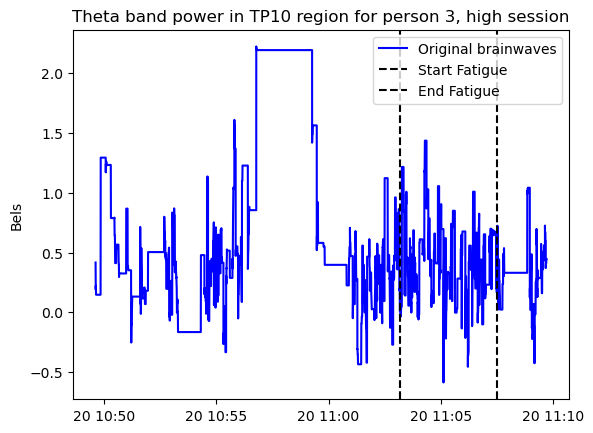

In [ ]:
person, session = 3, 'high'


df = get_wavelength_df(person, session, 'theta')['TP10']

# mean = df.rolling(500).mean()
# std = df.rolling(500).std()


plt.plot(df, color='blue', label='Original brainwaves')

# plt.plot(mean, color='red', label='Rolling mean')

# plt.plot(std, color='black', label='Rolling standard deviation')


a = find_utc_time_for_event('start_fatigue', person, session)

b = find_utc_time_for_event('end_fatigue', person, session)

plt.axvline(a, color='black', linestyle='--', label='Start Fatigue')
plt.axvline(b, color='black', linestyle='--', label='End Fatigue')

plt.legend(loc='best')
plt.title('Theta band power in TP10 region for person 3, high session')
plt.ylabel('Bels')



# Subplot based on time period, person-session, noting inconsistensies

In [1]:
# Plotting 
band = 'theta'

total_base_to_fatigue = 0
total_fatigue_to_measure = 0
for person in range(1, 13):
    baseline_mean = 0
    fatigue_mean = 0
    measure_mean = 0
    for session in range(1, 4):
        person, session = remap_person_and_session(person, session)
        df = get_wavelength_df(person, session, band)
        baseline_raw = slice_df(df, 'start_baseline', 'end_baseline')
        fatiguing_raw = slice_df(df, 'start_fatigue', 'end_fatigue')
        measurement_3_raw = slice_df(df, 'end_fatigue', 'end_session')

        a, b, c = subplot_df(baseline_raw, fatiguing_raw, measurement_3_raw, 'AF8', person=person, session=session, band=band, horizontal=True)
        baseline_mean += a
        fatigue_mean += b
        measure_mean += c
    # print(f'Person {person} averages: baseline {baseline_mean/3}, fatigue {fatigue_mean/3}, measure {measure_mean/3}')
    # print(f'Baseline --> Fatigue: {(fatigue_mean/3 - baseline_mean/3):+.2f}, Fatigue --> Measure: {(measure_mean/3 - fatigue_mean/3):+.2f}')
    total_base_to_fatigue += (fatigue_mean/3 - baseline_mean/3)
    total_fatigue_to_measure += (measure_mean/3 - fatigue_mean/3)
print(f'Average baseline --> fatigue: {total_base_to_fatigue/12:.2f}, Average fatigue --> measure: {total_fatigue_to_measure/12:.2f}')

NameError: name 'remap_person_and_session' is not defined

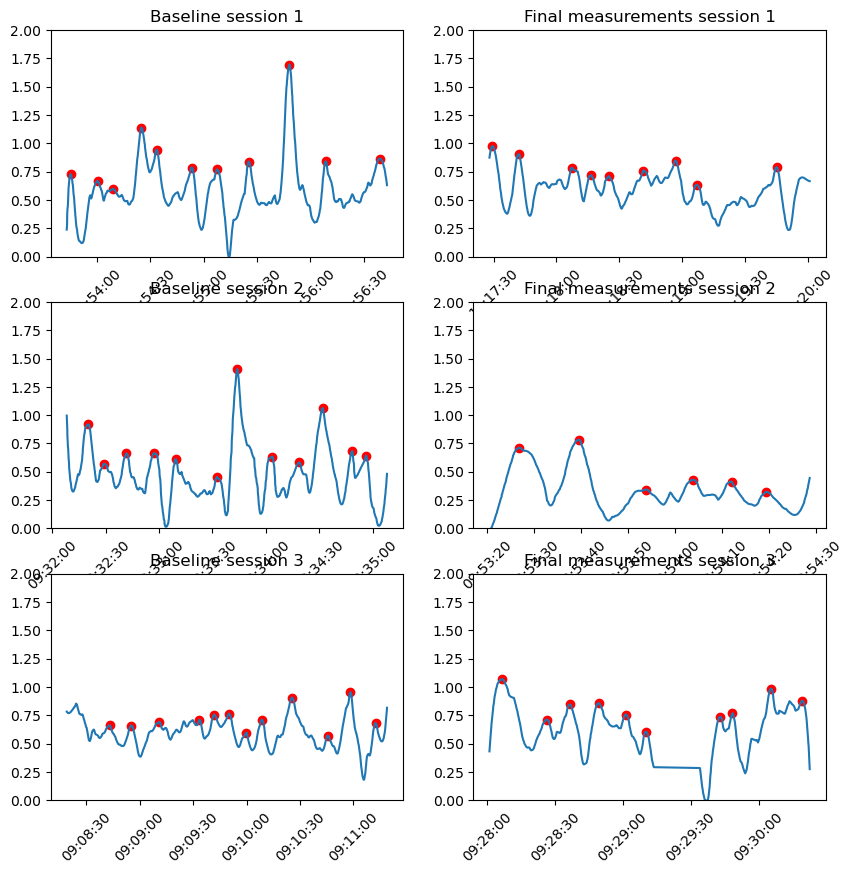

In [ ]:


alpha_1_1 = get_forehead_eeg_alpha_abs('01', '03')

baseline_raw = slice_df(alpha_1_1, 'start_baseline', 'end_baseline')


# measurement_3_raw = slice_df(alpha_1_1, 'end_fatigue', 'end_session')


# plot_raw_series(baseline_raw, 'TP9')

scale = 30
plot_df(baseline_raw, 'TP9', window_size=floor(len(baseline_raw)/scale), title='Baseline')

# _ = plot_df(measurement_3_raw, 'TP9', window_size=floor(len(measurement_3_raw)/scale), title='Measurement 3')


